In [1]:
import numpy as np
import matplotlib.pyplot as plt

# SVD

$A = USV^T$

Properties:

$U$ and $V$ are orthogonal matrices so that $U^TU = I$ and $V^TV = I$.

$S$ is a diagonal matrix containing singular values.  These are the square roots of the eigenvalues of $A^TA$ or $AA^T$. 

The eigenvectors of $A^TA$ make up the columns of $V$ , the eigenvectors of $AA^T$  make up the columns of $U$. 

First step in finding the SVD, find the singular values of $AA^T$!

In [251]:
A = np.array([[3,2,2], [2,3,-2]])

print('A \n\n', A, '\n\n AAT \n\n', A@A.T, '\n\n ATA \n\n', A.T@A)

A 

 [[ 3  2  2]
 [ 2  3 -2]] 

 AAT 

 [[17  8]
 [ 8 17]] 

 ATA 

 [[13 12  2]
 [12 13 -2]
 [ 2 -2  8]]


$A^TA = \begin{bmatrix} 17 & 8 \\ 8 & 17\end{bmatrix}$

$A^TA - \lambda I = \begin{bmatrix} 17-\lambda & 8 \\ 8 & 17-\lambda \end{bmatrix}$

We find the characteristic polynomial of $A^TA$, which for a square matrix is the determinant of $A^T A$

$det(A^TA - \lambda I) = (17 - \lambda)^2 - 8^2 = \lambda^2 + 34 \lambda + 225 = (\lambda - 25)(\lambda - 9)$

Our eigenvalues are the zeroes of the characteristic polynomial.  $\lambda_1 = 25$ and $\lambda_2 = 9$.  Our singular values are the square roots of the eigenvalues: $\sigma_1 = 5$ and $\sigma_2 = 3$

Now we proceed by either finding the right singular vectors (the columns of V ) by finding an orthonormal
set of eigenvectors of $A^T A$ or by finding the left singular vectors (columns of U) as the orthonormal set of eigenvectors of $AA^T$ instead. 

For $\lambda = 25$

$A^TA - 25I = \begin{bmatrix} 13-25 & 12 & 2 \\ 12 & 13-25 & -2 \\ 2 & -2 & 8-25\end{bmatrix} = \begin{bmatrix} -12 & 12 & 2 \\ 12 & -12 & -2 \\ 2 & -2 & -17\end{bmatrix}$

We reduce the matrix to reduced row-echelon form

$\begin{bmatrix} -12 & 12 & 2 \\ 12 & -12 & -2 \\ 2 & -2 & -17\end{bmatrix} \rightarrow \begin{bmatrix} -12 & 12 & 2 \\ 0 & 0 & 0 \\ 2 & -2 & -17\end{bmatrix} \rightarrow \begin{bmatrix} 1 & -1 & -1/6 \\ 2 & -2 & -17 \\ 0 & 0 & 0\end{bmatrix} \rightarrow \begin{bmatrix} 1 & -1 & -1/6 \\ 0 & 0 & -50/3\\ 0 & 0 & 0\end{bmatrix} \rightarrow \begin{bmatrix} 1 & -1 & -1/6 \\ 0 & 0 & 1\\ 0 & 0 & 0\end{bmatrix}$

To find the eigenvector of this matrix, we first look for a vector for which the following equation is satisfied:

$\begin{bmatrix} 1 & -1 & -1/6 \\ 0 & 0 & 1\\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$

$x_1 - x_2 - 1/6 x_3 = 0$

$x_3 = 0$ 

$x_1 = x_2$ and $x_3 = 0$

$x_1$ and $x_2$ can be anything, so let's make them $x_1 = x_2 = 1$

Our first eigenvector $v_1 = \begin{bmatrix}1 \\1 \\ 0 \end{bmatrix}$.  However, the columns of an orthonormal matrix must have unit length.  Therefore, we divide $v_1$ by it's norm.  

$v_1 = \frac{v_1}{||v_1||_2} = \begin{bmatrix}1/\sqrt{2} \\1/\sqrt{2} \\ 0 \end{bmatrix}$

We repeat the same process for $\lambda = 9$ to find $v_2 = \begin{bmatrix}1/\sqrt{18} \\-1/\sqrt{18} \\ 4/\sqrt{18} \end{bmatrix}$

The third column of $V$ has to be perpendicular to the first two columns.  Two vectors are perpendicular if their dot products are zero.  

$1/\sqrt{2} x_1 + 1/\sqrt{2} x_2 = 0 \rightarrow x_1 + x_2 = 0$

$1/\sqrt{18} x_1 -1/\sqrt{18} x_2 + 4/\sqrt{18} x_3 = 0 \rightarrow x_1 - x_2 + 4x_3 = 0$

$2x_1 + 4x_3 = 0$

$x_1 = -x_2 = -2x_3$

Let's say $v_3 = \begin{bmatrix}1\\ -1\\ -2\end{bmatrix}$.  Now, we need to make sure it has unit length

$v_3 = \frac{v_3}{||v_3|_2} = \begin{bmatrix}2/3 \\ -2/3\\ -1/3\end{bmatrix}$


Now, we have $V^T = \begin{bmatrix} 1\sqrt{2} & 1/\sqrt{2} & 0 \\ 1/\sqrt{18} & -1/\sqrt{18} & 4/\sqrt{18}\\ 2/3 & -2/3 & -1/3\end{bmatrix}$ 

We now want to find $U$.  

$A = USV^T$

$AV = US$

$AVS^{-1} = U$

We can carry out the matrix multiplication to find 

$U = \begin{bmatrix} 1/\sqrt{2} & 1/\sqrt{2} \\ 1/\sqrt{2}  & -1/\sqrt{2}\end{bmatrix}$

$A = \begin{bmatrix} 1/\sqrt{2} & 1/\sqrt{2} \\ 1/\sqrt{2}  & -1/\sqrt{2}\end{bmatrix} \begin{bmatrix} 5 & 0 & 0 \\ 0 & 3 & 0 \end{bmatrix}\begin{bmatrix} 1\sqrt{2} & 1/\sqrt{2} & 0 \\ 1/\sqrt{18} & -1/\sqrt{18} & 4/\sqrt{18}\\ 2/3 & -2/3 & -1/3\end{bmatrix}$


In [109]:
A = np.array([[5, 2], [1, 3]])

U,S,Vh = np.linalg.svd(A)      

print('A \n\n', A, ' \n\n U \n\n ', U, '\n\n S \n\n',  np.diag(S),'\n\n Vh \n\n',  Vh)

A 

 [[5 2]
 [1 3]]  

 U 

  [[-0.9092909 -0.4161611]
 [-0.4161611  0.9092909]] 

 S 

 [[5.83390451 0.        ]
 [0.         2.22835324]] 

 Vh 

 [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


U and V are unitary/orthogonal matrices, i.e. square matrices whose columns and rows are orthonormal vectors! Let's check if this is true.


In [99]:
print('Check rows and columns are perpendicular vectors')
print('\n\n dot product of columns of U', np.dot(U[:,0], U[:,1]), '\n\n rows of U', np.dot(U[0,:],U[1,:]), 
      '\n\n columns of Vh', np.dot(Vh[:,0], Vh[:,1]), '\n\n rows of Vh', np.dot(Vh[0,:],Vh[1,:]))

print('\n\n Check UTU and VTV are I \n\n')

print('UTU \n\n', U.T@U, '\n\n VTV \n\n', Vh.T@Vh)

Check rows and columns are perpendicular vectors


 dot product of columns of U 1.1102230246251565e-16 

 rows of U 1.1102230246251565e-16 

 columns of Vh 0.0 

 rows of Vh 0.0


 Check UTU and VTV are I 


UTU 

 [[1.00000000e+00 1.27560764e-16]
 [1.27560764e-16 1.00000000e+00]] 

 VTV 

 [[1.00000000e+00 2.29948585e-17]
 [2.29948585e-17 1.00000000e+00]]


[[1. 0.]
 [0. 1.]] 

 [[5. 2.]
 [1. 3.]] 

 [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]] 

 [[-4.96261559 -3.06706511]
 [-1.17151463  1.89555048]] 

 [[5. 2.]
 [1. 3.]]


 length of vectors from step 2 to 3 [5.09901951 3.60555128] [5.09901951 3.60555128]


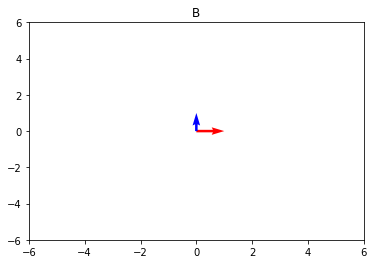

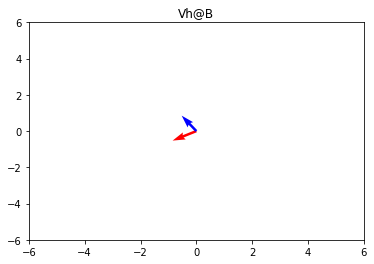

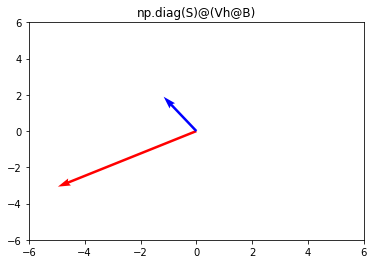

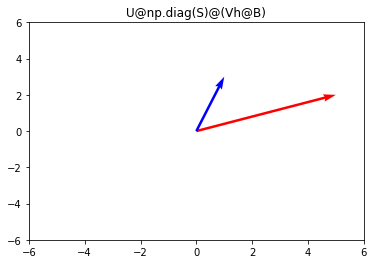

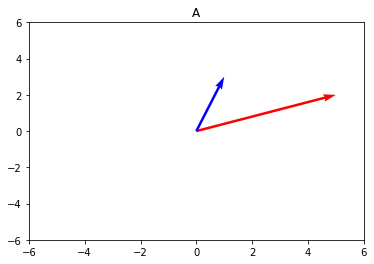

In [93]:
B = np.eye(2)

print(B, '\n\n', B@A, '\n\n', Vh@B, '\n\n', np.diag(S)@(Vh)@B, '\n\n', ((B@U)@np.diag(S))@Vh)

origin = np.array([[0, 0],[0, 0]]) # origin point 

plt.figure()
plt.quiver(*origin, B[:,0], B[:, 1],  color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('B')

plt.figure()
plt.quiver(*origin, Vh[:,0], Vh[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('Vh@B')

scale = np.diag(S)@(Vh)

plt.figure()
plt.quiver(*origin, scale[:,0], scale[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('np.diag(S)@(Vh@B)')

final = U@np.diag(S)@(Vh)

plt.figure()
plt.quiver(*origin, final[:,0], final[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('U@np.diag(S)@(Vh@B)')

plt.figure()
plt.quiver(*origin, A[:,0], A[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('A')


print('\n\n length of vectors from step 2 to 3', np.linalg.norm(scale, 2, axis = 0), np.linalg.norm(final, 2, axis=0))


We want to find $A^{-1}$. We know $U^TU = I$ and $V^TV = I$.  We also know $A = USV^T$.  Show $A^{-1} = VS^{-1}U^T$.  That means, show $A^{-1}A = I$ and $AA^{-1} = I$.

$A^{-1}A = VS^{-1}U^T(USV^T) = VS^{-1}SV^T = VV^T = I$

$AA^{-1} = USV^T(VS^{-1}U^T) = USS^{-1}U^T = UU^T = I$

Great! We have shown $A^{-1} = VS^{-1}U^T$.

This means, that once we find the SVD, we know everything we need to know.  $S^{-1}$ is easy to find, because $S$ is a diagonal matrix.  The inverse of a diagonal matrix, is simply the inverse of the entries on the diagonal. 

In [120]:
S = np.diag([1,2,3])

Sinv = np.linalg.inv(S)

print('S \n\n', S, '\n\n Sinv \n\n', Sinv)

S 

 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

 Sinv 

 [[1.         0.         0.        ]
 [0.         0.5        0.        ]
 [0.         0.         0.33333333]]


The logic is to undo the rotations and stretching from the original operation.  So undo the last rotation $U^T$, unstretch $1/s_i$, and undo the first rotation $V$

[[5 2]
 [1 3]] 

 [[-4.96261559 -3.06706511]
 [-1.17151463  1.89555048]] 

 [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]] 

 [[1.00000000e+00 2.77555756e-16]
 [1.11022302e-16 1.00000000e+00]]


Text(0.5, 1.0, 'B')

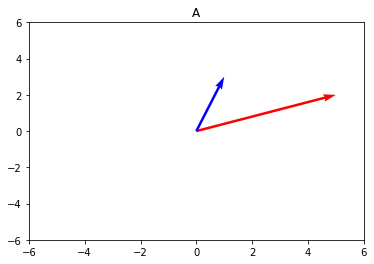

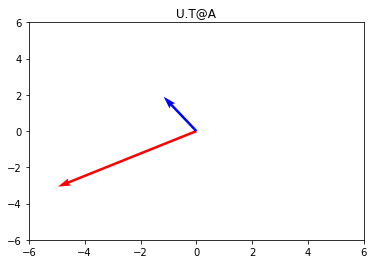

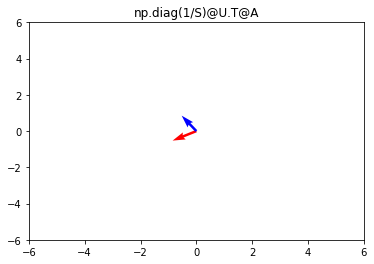

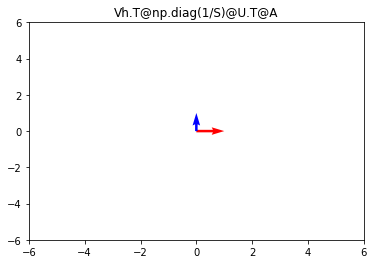

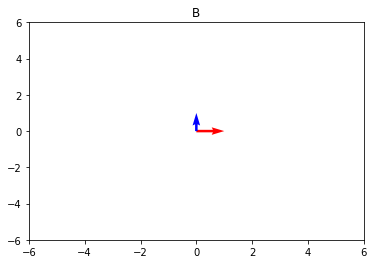

In [119]:
print(A, '\n\n', U.T@A, '\n\n',np.diag(1/S)@(U.T)@A, '\n\n', Vh.T@np.diag(1/S)@(U.T)@A)

plt.figure()
plt.quiver(*origin, A[:,0], A[:, 1],  color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('A')

rotate = U.T@A

plt.figure()
plt.quiver(*origin, rotate[:,0], rotate[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('U.T@A')

scale = np.diag(1/S)@U.T@A

plt.figure()
plt.quiver(*origin, scale[:,0], scale[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('np.diag(1/S)@U.T@A')

final = Vh.T@np.diag(1/S)@U.T@A

plt.figure()
plt.quiver(*origin, final[:,0], final[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('Vh.T@np.diag(1/S)@U.T@A')

plt.figure()
plt.quiver(*origin, B[:,0], B[:,1], color = ['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.axis([-6, 6, -6, 6])
plt.title('B')



# What happens if A does not have an inverse?

In [139]:
A = np.array([[1,2, 3], [1,2, 5], [1,2,4]])

U, S, Vh = np.linalg.svd(A)

print('A \n\n', A, ' \n\n U \n\n ', U, '\n\n S \n\n',  np.diag(S),'\n\n Vh \n\n',  Vh)


A 

 [[1 2 3]
 [1 2 5]
 [1 2 4]]  

 U 

  [[-0.46093796  0.78795275 -0.40824829]
 [-0.67984527 -0.60921567 -0.40824829]
 [-0.57039162  0.08936854  0.81649658]] 

 S 

 [[8.03337644e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.81808654e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.73878773e-17]] 

 Vh 

 [[-2.13008175e-01 -4.26016350e-01 -8.79282427e-01]
 [ 3.93227056e-01  7.86454111e-01 -4.76300759e-01]
 [-8.94427191e-01  4.47213595e-01  4.18972642e-17]]


A no longer has an inverse, because one of its singular values is 0!

In [140]:
print(np.linalg.inv(A))

LinAlgError: Singular matrix

But we can find a psuedo-inverse.  $A^{-1} \approx V \Sigma U^T$ where we define $\Sigma$ as a matrix with $1/s_i$ for nonzero entires of $S$ and $0$ for $0$ entries of S



In [146]:
Apinv = np.linalg.pinv(A)

Sigma = np.zeros((3,3))
Sigma[np.arange(2), np.arange(2)] = 1/S[:2]

print('Sigma \n\n', Sigma, '\n\n')

pinverse = Vh.T@Sigma@U.T

print('numpy pinv \n\n', Apinv, '\n\n our pinv \n\n', pinverse)


Sigma 

 [[0.12448066 0.         0.        ]
 [0.         1.46668716 0.        ]
 [0.         0.         0.        ]] 


numpy pinv 

 [[ 4.66666667e-01 -3.33333333e-01  6.66666667e-02]
 [ 9.33333333e-01 -6.66666667e-01  1.33333333e-01]
 [-5.00000000e-01  5.00000000e-01  5.53693930e-19]] 

 our pinv 

 [[ 0.46666667 -0.33333333  0.06666667]
 [ 0.93333333 -0.66666667  0.13333333]
 [-0.5         0.5         0.        ]]


Same process works when A is not a square matrix.

In [211]:
A = np.random.rand(6,5)

U,S,Vh = np.linalg.svd(A)

Sigma = np.zeros((6,5))
Sigma[np.arange(5), np.arange(5)] = S

print('A \n\n', A, ' \n\n U \n\n ', U, '\n\n S \n\n',  Sigma,'\n\n Vh \n\n',  Vh)

A 

 [[0.03727729 0.16450971 0.21549141 0.65229641 0.1061889 ]
 [0.53077848 0.61508567 0.05578091 0.50145004 0.41650245]
 [0.05514942 0.08928034 0.13342802 0.76177817 0.87349197]
 [0.91972796 0.6769716  0.83972271 0.86447231 0.99980358]
 [0.26803916 0.94731076 0.3914981  0.67068038 0.60632952]
 [0.53723812 0.65290212 0.89520142 0.34652062 0.32815456]]  

 U 

  [[-0.18614686 -0.23341926  0.08318438 -0.69340196 -0.64414386 -0.09065073]
 [-0.32186663 -0.01648763  0.48560074  0.51324357 -0.45248367  0.43836231]
 [-0.31081434 -0.76432207 -0.25992493 -0.03195345  0.3125875   0.39104128]
 [-0.64026404  0.08177359 -0.46144119  0.31107813 -0.1694085  -0.49495274]
 [-0.4438988  -0.00623513  0.65537013 -0.19989913  0.47630249 -0.32646782]
 [-0.39769521  0.5952559  -0.21742431 -0.34354688  0.16450825  0.54327542]] 

 S 

 [[2.98454283 0.         0.         0.         0.        ]
 [0.         0.9032092  0.         0.         0.        ]
 [0.         0.         0.59015053 0.         0.        ]
 [0

# Why else is the SVD super cool?

The entries of S, known as singular values, tell us a lot of information! We can use them for dimensionality reduction!

In [220]:
from mnist import MNIST

def load_dataset():
    mndata = MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training()) 
    X_test, labels_test = map(np.array, mndata.load_testing()) 
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    return X_train, X_test, labels_train, labels_test

X_train, X_test, labels_train, labels_test = load_dataset()



Let's take a single image in the MNIST data set:

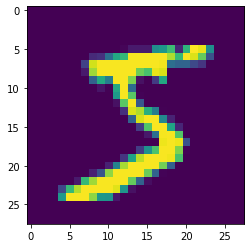

In [230]:
image = X_train[0].reshape(28,28)

plt.imshow(image)

I want to represent this image with as few pixels as possible! Let's use the SVD.

In [256]:
U,S, Vh = np.linalg.svd(image)

print('singular values \n\n', S)

Sigma = np.diag(S)



singular values 

 [7.17794455e+00 4.26097316e+00 2.91638877e+00 2.17268255e+00
 1.93660480e+00 1.43710313e+00 1.08048559e+00 8.46567024e-01
 5.29774602e-01 4.27165770e-01 3.09601558e-01 2.64421349e-01
 2.55522274e-01 1.45562359e-01 1.29301242e-01 8.69435125e-02
 6.74827332e-02 2.88063377e-02 5.57708250e-03 6.79616286e-05
 4.78732172e-16 4.78732172e-16 4.78732172e-16 4.78732172e-16
 4.78732172e-16 4.78732172e-16 4.78732172e-16 4.78732172e-16]


number of singular values used in reconstruction: 1
number of singular values used in reconstruction: 3
number of singular values used in reconstruction: 5
number of singular values used in reconstruction: 7
number of singular values used in reconstruction: 9
number of singular values used in reconstruction: 11
number of singular values used in reconstruction: 13
number of singular values used in reconstruction: 15
number of singular values used in reconstruction: 17
number of singular values used in reconstruction: 19
number of singular values used in reconstruction: 21
number of singular values used in reconstruction: 23
number of singular values used in reconstruction: 25
number of singular values used in reconstruction: 27


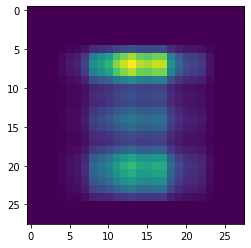

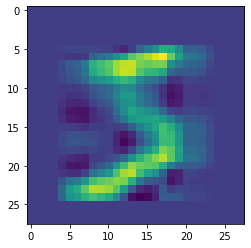

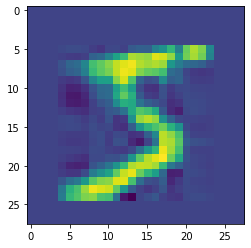

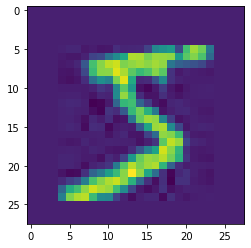

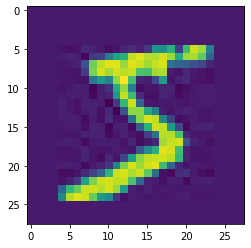

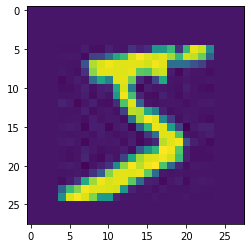

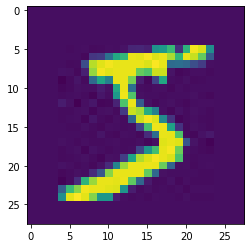

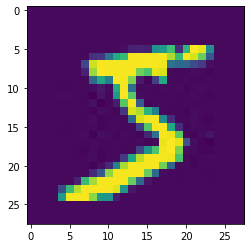

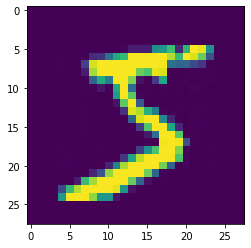

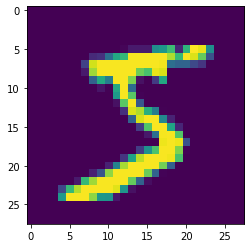

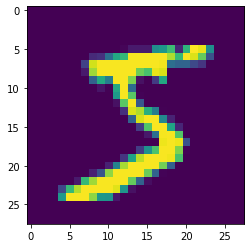

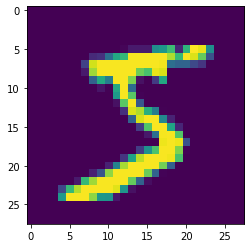

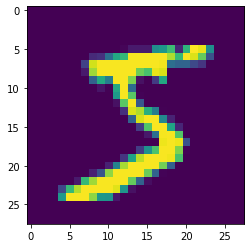

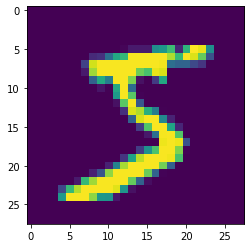

In [243]:
for i in range(1, 28, 2):
    print('number of singular values used in reconstruction:', i)
    image_recon = U[:,:i]@Sigma[:i,:i]@Vh[:i,:]

    
    plt.figure()
    plt.imshow(image_recon)

Tasks for next week:

1) What are the most important pixels for each digit? You were right! Just use the big X solution.  Pick out the top 40 pixels for each column (some may be zero) and visualize them. 

0viz = np.zeros(784)

0viz[indices of top 40 largest pixles for 0th column] = values at those 40 indices

plt.imshow(0viz.reshape(28,28))


1) How to choose $\lambda$? Cross validation!

We want to choose a value of $\lambda$ that gives us the highest accuracy/lowest error on the test set.  But we can't tune $\lambda$ on our test set! That's cheating!!

Instead, we can split our train data into training and validation.  See function train_test_split()

Then, we can calculate our train and validation errors for various values of lambda.  The validation error, should be a good estimate of test error, since we're validating on data we haven't trained our model on.  We choose the value of lambda that gives us the lowest validation error.  Usually, validation error decreases up to some point and then increases.  As we decrease $\lambda$, both training and validation error will decrease, since we'll allow more information to be stored in $X$.  At some point however, we'll be forming a model that is too specialized to the train set and won't generalize well.  That's when we expect to see the validation error increase. 

We'll define error as number of wrong predictions (np.count_nonzero(predictions - true_predictions) divided by N (the number of predictions)

Plot both your validation error and train error on a sing;e plot with $\lambda$ on the x-axis and classification error on the y-axis. 


2) Solve using ridge regression

Let's do ridge regression again, but now by hand!  No built in solvers. 

$\widehat{X} = \arg \min_{X \in \mathbb{R}^{d\times k}}||AX - B||_2^2 + \lambda ||X||_F^2 = \arg \min_{X \in \mathbb{R}^{d\times k}} \sum_{i=1}^n ||X^Ta_i - b_i||_2^2 + \lambda ||X||_F^2$


Here, the Frobenius norm is defined as $||W||_F^2 = \sum_{i=1}^d \sum_{j=1}^k X_{ij}^2$  $a_i \in \mathbb{R}^d$ is a single row of our train matrix $A$.  $b_i$ is a single row of our labels $B$. 

Let $e_i$ denote a vector of all $0$'s except for a $1$ in the $ith$ position. 

$\sum_{i=1} ||X^T a_i - b_i||_2^2 + \lambda ||X||_F^2 = \sum_{j=0}^k \bigg[\sum_{i=1}^n (e_j^TX^Ta_i - e_j^Tb_i)^2 + \lambda ||Xe_j||^2 \bigg] = $

$=\sum_{j=0}^k \bigg[\sum_{i=1}^n (x_j^Ta_i - e_j^Tb_i)^2 + \lambda ||x_j||^2 \bigg]$

$= \sum_{j=0}^k ||Ax_j - Be_j||^2 + \lambda ||x_j||^2$

Show that $\widehat{X} = (A^TA + \lambda I)^{-1} A^TB$.  Take the derivative of the above expression with respect to $x_j$.

First, note that $f(x) = |x|$ then $f^{'}(x) = \frac{x}{|x}$.  Then if $f(x) = |x|^2$, by the chain rule, $f^{'}(x) = 2|x| \frac{x}{|x|} = 2x$.  So when I take the derivative of $|x|^2$, I'm just going to skip over the intermediate step. I'm going to take the derivative of the first term in the above summation.

$\frac{\partial}{\partial x_j} \bigg(\sum_{j=0}^k ||Ax_j - Be_j||^2 \bigg) = \frac{\partial}{\partial x_j}\bigg( ||Ax_j - Be_j||^2 \bigg)$ becuase we're taking the derivative with respect to each column of X individually


$Ax_j = \begin{bmatrix} <a_o, x_j> \\ <a_1, x_j> \\ \vdots \\ <a_n, x_j> \end{bmatrix}$  where $a_i$ is a row of A and $<a_i, x_j> = \sum_k a_{ik} x_{jk}$

To take the derivative of $<a_n, x_j>\sum_k a_{ik} x_{jk}$ with respect to $x_j$, we have to take the derivative wrt to each component of $x_j$.  Then, the derivative is $a$ transposed into a column vector.  Let me know if this makes sense or not.

$Be_j$ is $b_j$, a single column of b


$||Ax_j - Be_j||^2 = |<a_o, x_j> - b_{j,0}|^2 + |<a_1, x_j> - b_{j,1}|^2 + \cdots + |<a_n, x_j> - b_{j,n}|^2$

$\frac{\partial}{\partial x_j} \bigg(||Ax_j - Be_j||^2 \bigg) = 2 a_o^T ( <a_o, x_j> - b_{j,0}) +  2 a_1^T ( <a_1, x_j> - b_{j,1}) + \cdots  2 a_n^T ( <a_n, x_j> - b_{j,0}) = \sum_{i=1}^n 2 a_i^T ( <a_i, x_j> - b_{j,i})$

$= \sum_{i=1}^n 2 a_i^T ( \sum_k a_{ik} x_{jk} - b_{j,i})$ This is a vector times a float.  So a single component $m$ of this vector is going to be 

$\sum_{i=1}^n 2 a_{m,i} ( \sum_k a_{ik} x_{jk} - b_{j,i}) = \sum_{i=1}^n 2 a_{m,i} \sum_k a_{ik} x_{jk} - \sum_{i=1}^n 2 a_{m,i} b_{j,i} = \sum_k \sum_{i=1}^n 2 a_{m,i}a_{ik} x_{jk} - \sum_{i=1}^n 2 a_{m,i} b_{j,i} $

Let $c_{m,k} = \sum_{i=1}^n a_{m,i}a_{ik}$ be an entry of this matrix.  Note, the matrix is equivalent to $A^TA$.  Then we can continue to simplify the above expression, 

$= 2 \sum_k c_{m,k} x_{j,k} - 2 \sum_{i=1}^n 2 a_{m,i} b_{j,i} = 2 <c_m, x_j> - 2<a_m, b_j>$  This is a row of $A^TA$ times the column $x_j$ minus a row of $A$ times columb $b_j$. So this is a single entry of our derivative vector $\frac{\partial}{\partial x_j} $

Then, we can summarize the entire derivative vector as $2A^T(Ax_j - Be_j)$.  This is very difficult to write out and make obvious.  I'll try to write it out better so that we can walk through it step by step at the next meeting.  I've found drawing pictures of the matrices and vectors and really understanding summation notation really helps.  

Long story short, $ \frac{\partial}{\partial x} ||Ax - b||_2^2$ is always $2A^T(Ax-b)$.  

Code up a function that takes as input $A$, $B$, $\lambda>0$ and returns $\widehat{X}$.

Code up a function that gives labels given input $A$, $X$. 

Train $\widehat{X}$ using training data with $\lambda = 10^{-4}$ and make label predictions on the test data.  What are the training and test error? They should both be about $15\%$. 

3) Use a non-linear feature transform!

Transform the features from 784 feature space to p space using $h(x) = cos(Gx + b)$ where $G \in \mathbb{R}^{p \times d}$, $b \in \mathbb{R}^p$ and the cosine function is applied elementwise. Let $G$ be a random matrix with each entry sampled i.i.d from a Guassian with $\mu = 0$ and variance $\sigma^1 = 0.1$ (np.random.normal) and $b$ be a random vector sampled i.i.d from the uniform distribution on $[0, 2 \pi]$ (np.random.uniform).  How do we choose p? Cross validation!!

Partition the training set into proportion 80/20 training + validation.  Train a $\widehat{X}^p$ for different values of $p$. Plot classifcaiton training error and validation error on a single plot with $p$ on the x-axis.  Your computer may run out of memory if $p$ is too large (p < 5000) should still run.  

